## Amazon Products Sales Dataset Analysis Project  

This notebook focuses on analyzing the **Amazon Products Sales Dataset**.  
In this section, we:  

1. **Import essential libraries**:  
   - NumPy for numerical operations.  
   - Pandas for data handling.  
   - Matplotlib & Seaborn for data visualization.  
   - Missingno for missing values visualization.  
   - Set Seaborn theme to `whitegrid` for clearer plots.  

2. **Load the dataset**:  
   - Read the `amazon_products_sales_data_uncleaned.csv` file into a Pandas DataFrame.  

3. **Perform initial exploration**:  
   - Display 5 random samples from the dataset.  
   - List all column names.  
   - Check dataset shape (rows × columns).  
   - View dataset info (data types and non-null values).  
   - Generate summary statistics of numerical columns (transposed for better readability).  


In [19]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set_theme(style="whitegrid")


In [20]:
# Load the dataset from a CSV file
df = pd.read_csv('Data/amazon_products_sales_data_uncleaned.csv')

In [21]:
# Display a random sample from the dataset
df.sample(5)

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
29454,Insta360 Motorcycle Selfie Stick Support Clamp,4.5 out of 5 stars,115,100+ bought in past month,48.99,basic variant price: $47.03,$54.99,No Badge,Organic,No Coupon,Add to cart,"Delivery Tue, Sep 9",NaN,https://m.media-amazon.com/images/I/51-0oe1+9u...,/Insta360-Motorcycle-Selfie-Stick-Support/dp/B...,2025-08-29 11:04:06
20032,"Belkin MagSafe-Compatible Charger, 3-in-1 Wire...",4.4 out of 5 stars,"3,539",1K+ bought in past month,119.99,basic variant price: nan,No Discount,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Wed, Sep 3",NaN,https://m.media-amazon.com/images/I/61XBmb46FV...,/sspa/click?ie=UTF8&spc=MTo0OTM1MTQ3NDA4ODMyNT...,2025-08-25 11:16:51
36119,"Apple Mid 2015 iPad Mini 4 7.9-inch, Wi-Fi, 64...",3.9 out of 5 stars,483,200+ bought in past month,109.00,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,NaN,"FREE delivery Thu, Sep 4Or fastest delivery To...",NaN,https://m.media-amazon.com/images/I/61MRDo+gSb...,/Apple-iPad-Wi-Fi-7-9-Inch-Tablet/dp/B01N8SQV1...,2025-08-30 00:17:44
3547,"Energizer MAX AA Batteries (16 Pack), Double A...",4.8 out of 5 stars,172,1K+ bought in past month,16.19,basic variant price: 16 Count (Pack of 1),No Discount,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/91wM+1e9MS...,NaN,2025-08-21 11:41:21
1525,"Avery Printable Round Labels, Sure Feed Techno...",4.7 out of 5 stars,"12,173",3K+ bought in past month,12.99,basic variant price: nan,$21.58,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/81tZ3lMhAz...,/Printable-Labels-Diameter-Customizable-22807/...,2025-08-21 11:26:26


In [22]:
# Display the column names of the dataset
df.columns

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'current/discounted_price', 'price_on_variant', 'listed_price',
       'is_best_seller', 'is_sponsored', 'is_couponed', 'buy_box_availability',
       'delivery_details', 'sustainability_badges', 'image_url', 'product_url',
       'collected_at'],
      dtype='object')

In [23]:
df.shape

(42675, 16)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [25]:
# Display summary statistics of the dataset
df.describe().T

,count,unique,top,freq
title,42675,8808,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",744
rating,41651,31,4.6 out of 5 stars,6151
number_of_reviews,41651,4413,25,626
bought_in_last_month,39458,59,100+ bought in past month,8801
current/discounted_price,30926,2576,29.99,825
price_on_variant,42675,3466,basic variant price: nan,21031
listed_price,42675,911,No Discount,30364
is_best_seller,42675,12,No Badge,40814
is_sponsored,42675,2,Organic,35664
is_couponed,42675,42,No Coupon,40727


---

## Data Cleaning – Missing Values  

Here we check and visualize missing data in the dataset:  

1. **Table of missing values**  
   - Show the number and percentage of missing values in each column.  

2. **Matrix plot (`msno.matrix`)**  
   - Visual overview of where values are missing across the dataset.  

3. **Bar plot (`msno.bar`)**  
   - Shows how complete each column is, with missing parts highlighted.  

These steps give us a quick understanding of which columns have missing data and how much is missing.  


In [26]:
# Data Cleaning
# Check for missing values in each column
missing_table = df.isnull().sum().to_frame(name='Missing Values')
missing_table['Percentage'] = ((missing_table['Missing Values'] / len(df)) * 100).round(2)
missing_table[missing_table['Missing Values']>0]

 

,Missing Values,Percentage
rating,1024,2.40
number_of_reviews,1024,2.40
bought_in_last_month,3217,7.54
current/discounted_price,11749,27.53
buy_box_availability,14653,34.34
delivery_details,11720,27.46
sustainability_badges,39267,92.01
product_url,2069,4.85


<Axes: >

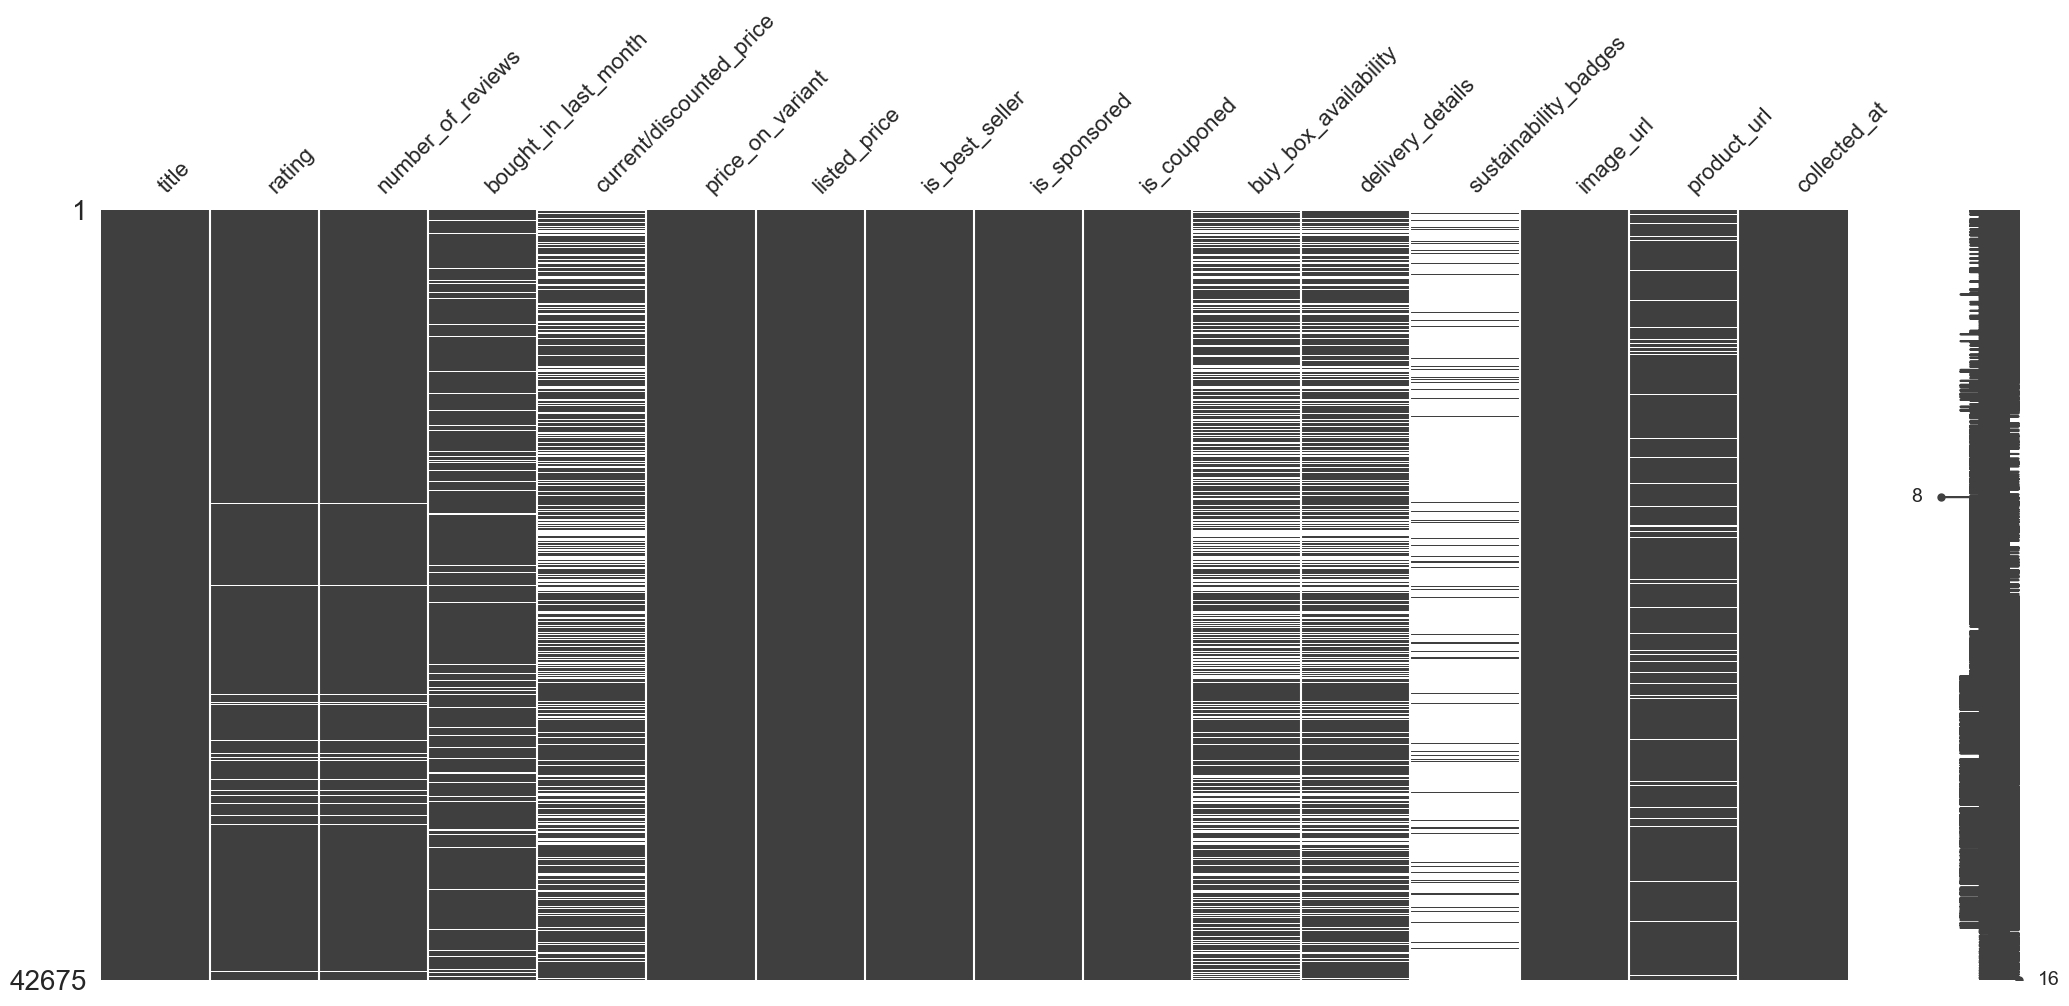

In [27]:
msno.matrix(df)

<Axes: >

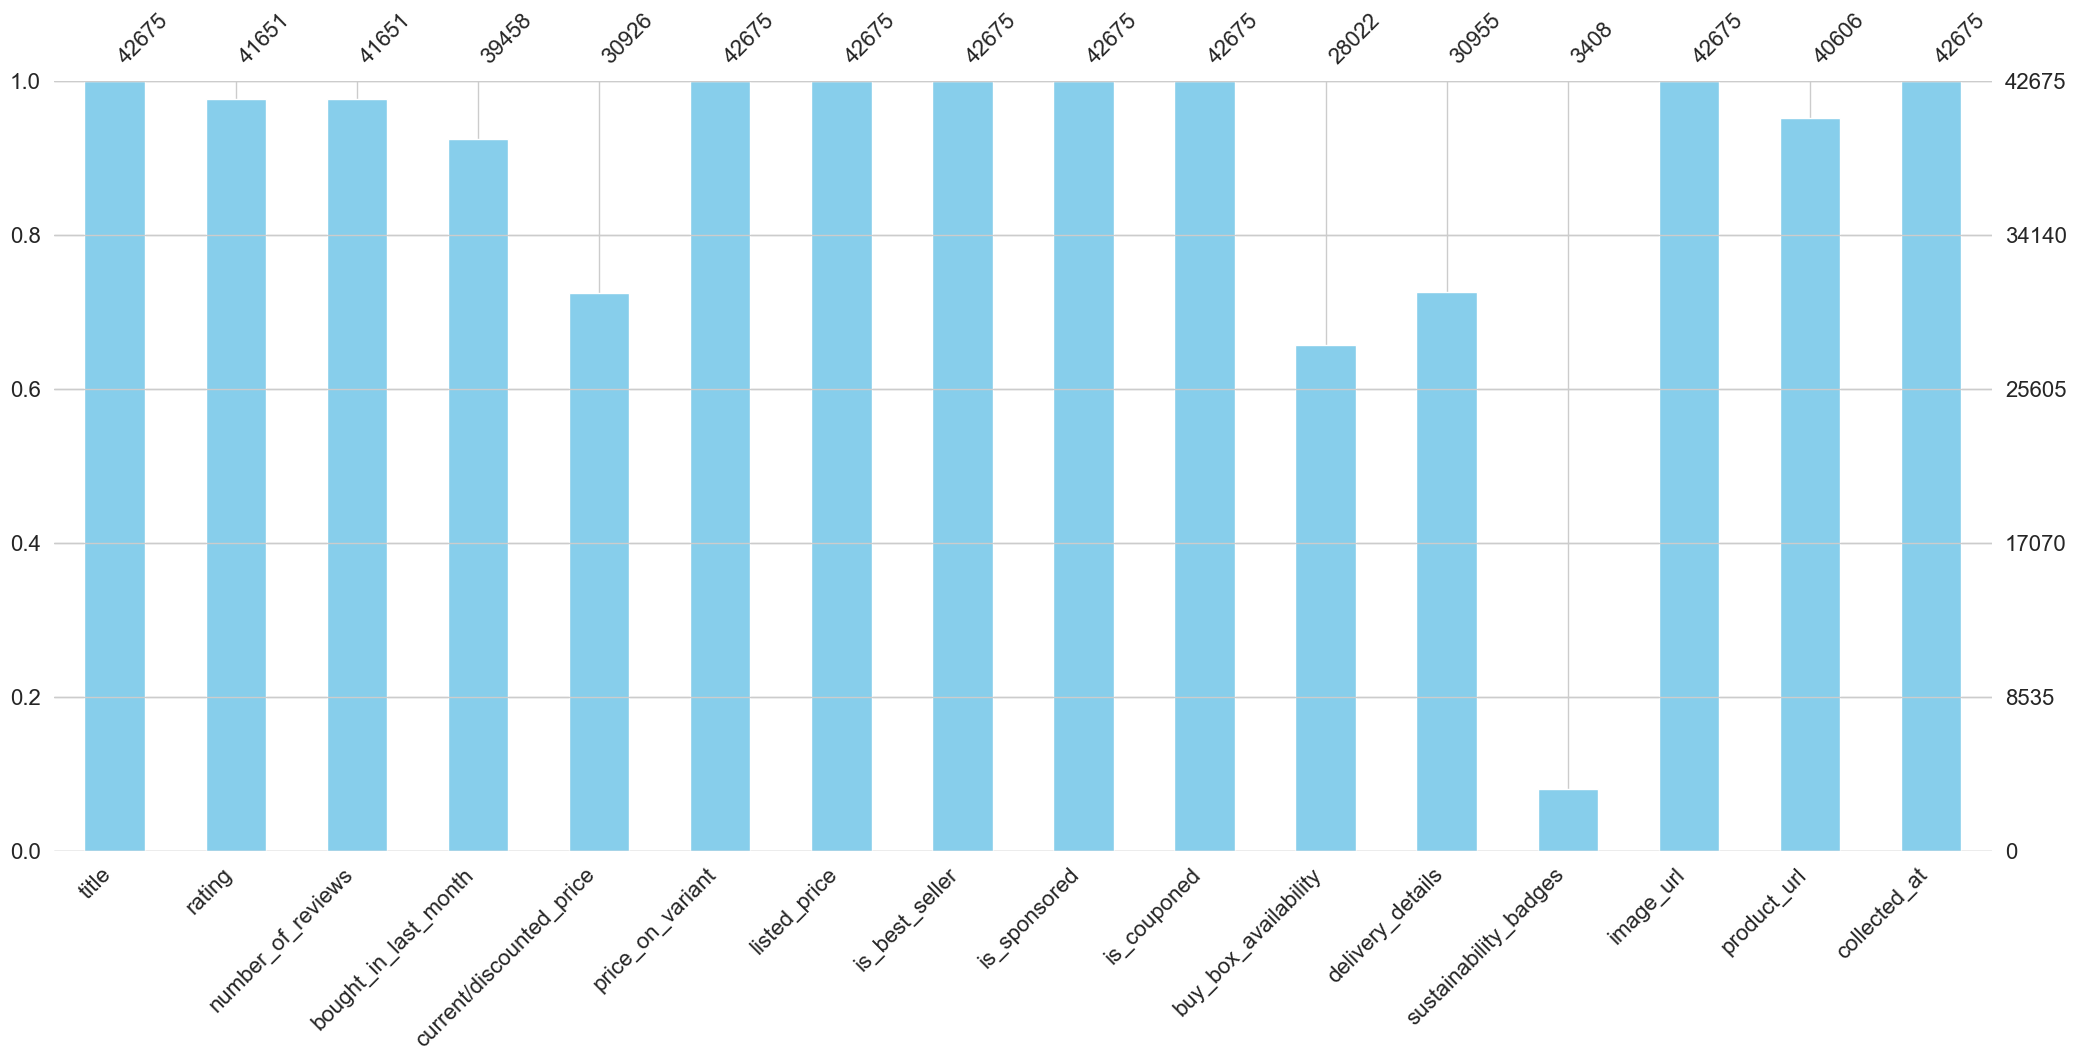

In [28]:
msno.bar(df,color='skyblue')

---

## Data Cleaning and Feature Engineering  

In this section, we clean and transform the dataset to prepare it for analysis:  

1. **Ratings column**  
   - Extract numeric values from the text (e.g., “4.5 out of 5 stars”).  
   - Convert to float and fill missing values with the column mean.  

2. **Number of Reviews column**  
   - Remove commas and convert to numeric.  
   - Fill missing values with the column mean.  

3. **Bought in Last Month column**  
   - Clean text by removing extra characters (e.g., “+ bought in past month”, “K”).  
   - Convert to integer and fill missing values with the column mean.  

4. **Drop unnecessary columns**  
   - Removed irrelevant columns such as sustainability details, product URLs, and image URLs.  

5. **Feature Engineering – Product Category**  
   - Created a function to clean product titles and map them into categories (e.g., Laptops, Phones, Headphones, etc.) based on keywords.  
   - Converted the new **category** column into a categorical datatype.  
   - Displayed the category distribution.  

6. **Price Columns**  
   - Cleaned and converted `price_on_variant`, `current/discounted_price`, and `listed_price` columns into numeric values.  
   - Handled missing values by:  
     - Filling from related price columns.  
     - Filling with the category mean where needed.  
   - Dropped the redundant `price_on_variant` column.  

These steps ensure that important numeric fields are properly formatted, missing values are handled, and a new **category feature** is available for analysis.  


In [29]:
# Extract the numeric values from the 'rating' column
df['rating'] = df['rating'].str.split('out of 5 stars').str[0].astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Handling missing values for rating column
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [30]:
# Extract the numeric values from the 'number_of_reviews' column
df['number_of_reviews'] = df['number_of_reviews'].str.replace(',','')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
# Handling missing values for number_of_reviews column
df['number_of_reviews'] = df['number_of_reviews'].fillna(df['number_of_reviews'].mean())

In [31]:
# Handling bought_in_last_month column
df['bought_in_last_month'] = df['bought_in_last_month'].str.replace('+ bought in past month','').str.strip().str.replace('K','000')
# Convert the 'bought_in_last_month' column as type int
df['bought_in_last_month'] = pd.to_numeric(df['bought_in_last_month'], errors='coerce')
# Handling missing values for bought_in_last_month column
df['bought_in_last_month'] = df['bought_in_last_month'].fillna(int(df['bought_in_last_month'].mean()))

In [32]:
# drop unnecessary columns (sustainability_badges, delivery_details, buy_box_availability, product_url, collected_at, image_url)
df.drop(columns=['sustainability_badges', 'delivery_details', 'buy_box_availability', 'product_url', 'collected_at', 'image_url','is_couponed'], inplace=True)

In [33]:
# feature engineering
import re

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# Expanded category keywords based on your file analysis
category_keywords = {
    'Laptops': [
        'laptop', 'notebook', 'macbook', 'chromebook', 'ultrabook', 'acer', 'asus', 'dell', 'lenovo', 'hp', 'core',
        'intel', 'ryzen', 'surface', 'thinkpad', 'ideapad'
    ],
    'Phones': [
        'phone', 'iphone', 'smartphone', 'samsung', 'android', 'galaxy', 'pixel', 'oneplus', 'xiaomi', 'oppo',
        'realme', 'huawei', 'vivo', 'nokia', 'motorola'
    ],
    'Headphones': [
        'headphone', 'headset', 'earphone', 'earbuds', 'airpods', 'beats', 'sony wh', 'wireless buds', 'neckband'
    ],
    'Chargers & Cables': [
        'charger', 'charging', 'cable', 'adapter', 'dock', 'usb c', 'type c', 'lightning', 'power adapter', 'usb cable'
    ],
    'Cameras': [
        'camera', 'dslr', 'mirrorless', 'canon', 'nikon', 'gopro', 'instax', 'webcam', 'camcorder', 'security camera'
    ],
    'Storage': [
        'ssd', 'hard drive', 'memory card', 'flash drive', 'pendrive', 'hdd', 'storage', 'micro sd', 'sd card'
    ],
    'Smart Home': [
        'alexa', 'echo', 'smart plug', 'smart bulb', 'smart home', 'nest', 'homekit', 'smart switch'
    ],
    'TV & Display': [
        'monitor', 'display', 'tv', 'screen', 'projector', 'oled', 'led', 'curved monitor', 'uhd', '4k'
    ],
    'Power & Batteries': [
        'battery', 'power bank', 'rechargeable', 'aa', 'aaa', 'portable power', 'cell'
    ],
    'Networking': [
        'wifi', 'router', 'modem', 'ethernet', 'access point', 'mesh', 'network switch'
    ],
    'Wearables': [
        'smartwatch', 'fitness band', 'fitbit', 'watch', 'garmin', 'amazfit'
    ],
    'Speakers': [
        'speaker', 'soundbar', 'subwoofer', 'bluetooth speaker', 'party speaker', 'home theater'
    ],
    'Printers & Scanners': [
        'printer', 'scanner', 'inkjet', 'laserjet', 'photocopier', 'all in one printer'
    ],
    'Gaming': [
        'gaming console', 'playstation', 'ps5', 'ps4', 'xbox', 'nintendo', 'joystick', 'controller', 'gaming mouse',
        'gaming keyboard', 'gaming chair'
    ],
    'Other Electronics': []
}

#  Simple mapping function (No Scoring)
def assign_category_simple(title):
    title_clean = clean_text(title)
    for category, keywords in category_keywords.items():
        for kw in keywords:
            if kw in title_clean:
                return category
    return 'Other Electronics'

#  Apply to dataframe

df['category'] = df['title'].apply(assign_category_simple)
# convert it to category datatype
df['category'] = df['category'].astype('category')

# Show category distribution
print(df['category'].value_counts())


category
Other Electronics      8755
Laptops                8693
Phones                 6563
Cameras                3677
Power & Batteries      2877
TV & Display           2630
Chargers & Cables      1833
Storage                1630
Speakers               1345
Networking             1070
Headphones              997
Printers & Scanners     877
Gaming                  809
Smart Home              465
Wearables               454
Name: count, dtype: int64


In [34]:
# Handling price_on_variant column
df['price_on_variant'] =df['price_on_variant'].str.replace('basic variant price: $','').str.strip()

# Convert the 'price_on_variant' column as type float
df['price_on_variant'] = pd.to_numeric(df['price_on_variant'], errors='coerce')

# Handling missing values for current/discounted_price column with price_on_variant column
df['current/discounted_price'] = df['current/discounted_price'].fillna(df['price_on_variant'])

# Convert the 'current/discounted_price' column as type float
df['current/discounted_price'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')

# handling missing values for listed_price column with current/discounted_price column
df['listed_price'] = df['listed_price'].fillna(df['current/discounted_price'])

# Handling listed_price column
df['listed_price'] = df['listed_price'].str.replace('$','').str.strip()

# Convert the 'listed_price' column as type float
df['listed_price'] = pd.to_numeric(df['listed_price'], errors='coerce')

# handling missing values for listed_price column with current/discounted_price column
df['listed_price'] = df['listed_price'].fillna(df['current/discounted_price'])

# drop columns (price_on_variant)
df.drop(columns=['price_on_variant'], inplace=True)

# handling missing values for listed_price column by mean grouped by category
df['listed_price'] = df.groupby('category')['listed_price'].transform(lambda x: x.fillna(x.mean()))

# Handling missing values for current/discounted_price by mean grouped by category
df['current/discounted_price'] = df.groupby('category')['current/discounted_price'].transform(lambda x:x.fillna(x.mean()))




/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1647/1050254847.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['listed_price'] = df.groupby('category')['listed_price'].transform(lambda x: x.fillna(x.mean()))
/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1647/1050254847.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['current/discounted_price'] = df.groupby('category')['current/discounted_price'].transform(lambda x:x.fillna(x.mean()))


## Feature Engineering – Price Features  

Here we add two new columns:  
- **discount_percentage** → the % discount between listed price and discounted price.  
- **price_difference** → the difference between listed price and discounted price.  

These features help us understand discounts and pricing gaps.  


In [35]:
# Create a new column 'discount_percentage' based on 'current/discounted_price' and 'listed_price'
df['discount_percentage'] = (((df['listed_price'] - df['current/discounted_price']) / df['listed_price']) * 100).round(2)
# Create a new column price_difference based on 'current/discounted_price' and 'listed_price'
df['price_difference'] = df['listed_price'] - df['current/discounted_price']

---

## Renaming Columns  

We rename some columns to make them clearer:  
- `listed_price` → `original_price`  
- `current/discounted_price` → `discounted_price`  
- `title` → `product_name`  
- `category` → `product_category`  


In [36]:
# rename columns for better understanding
df.rename(columns={
    'listed_price': 'original_price', 
    'current/discounted_price': 'discounted_price',
    'title': 'product_name',
    'category': 'product_category', 
    }, inplace=True)

---

## Univariate Analysis  

In this step, we explore individual features of the dataset using visualizations:  

- **Product Category** → Count plot showing how products are distributed across categories.  
- **Rating** → Histogram showing the distribution of product ratings.  
- **Original Price** → Histogram of original (listed) prices.  
- **Discounted Price** → Histogram of discounted prices.  
- **Discount Percentage** → Histogram of discount percentages.  
- **Is Sponsored** → Count plot showing how many products are sponsored vs. not sponsored.  

These plots help us understand the distribution and frequency of key variables.  


/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1647/758957463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='product_category',palette='viridis',order=df['product_category'].value_counts().index)


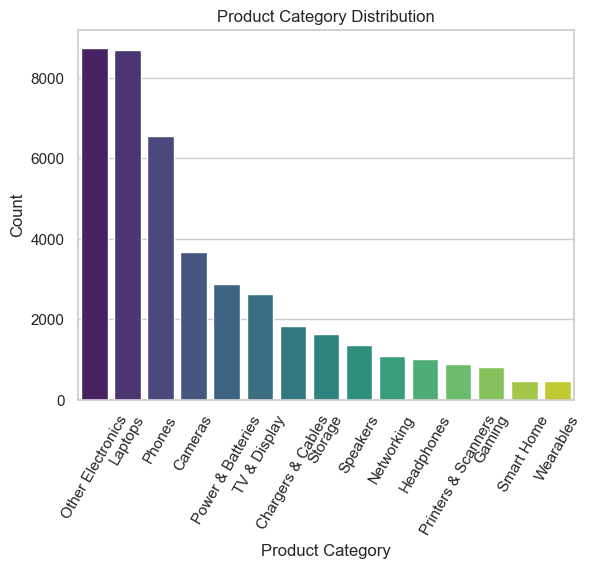

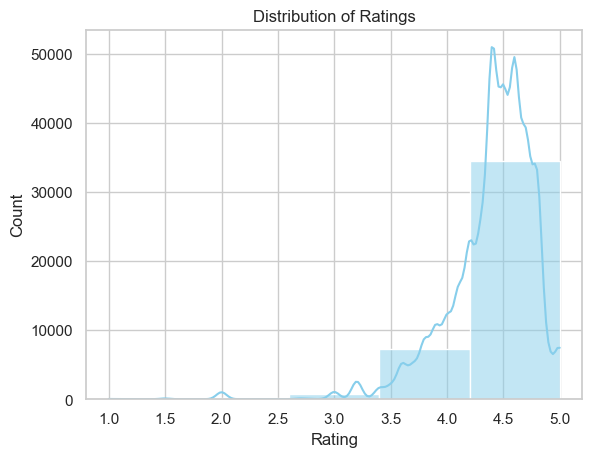

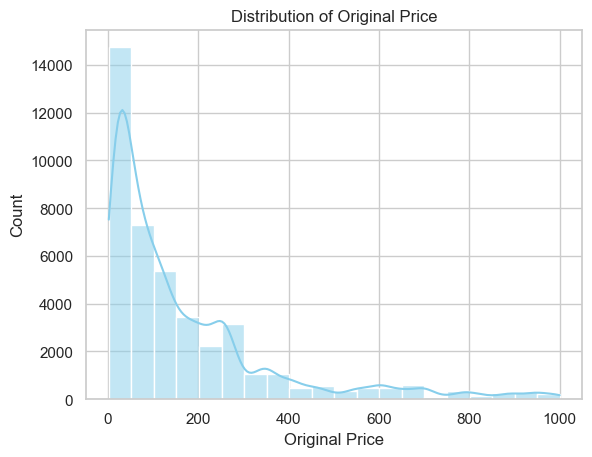

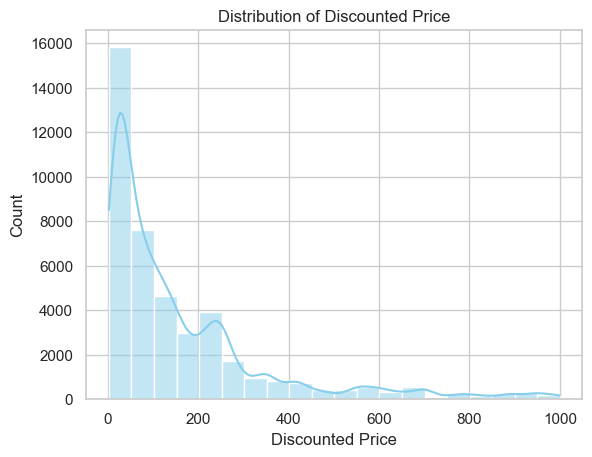

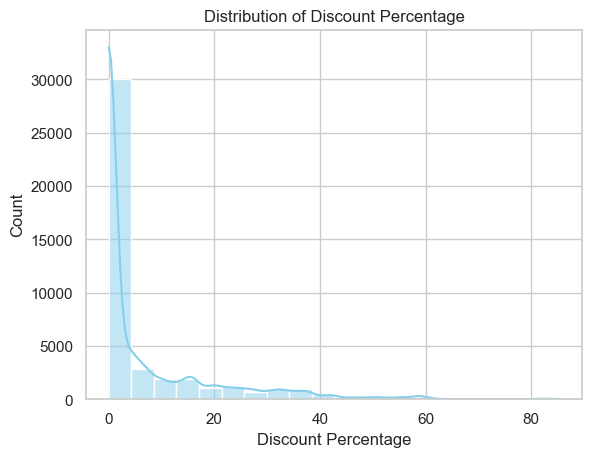

In [38]:
# Univariate Analysis
# Visualize product_category
sns.countplot(data=df, x='product_category',palette='viridis',order=df['product_category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()
# Distribution of ratings
sns.histplot(data=df, x='rating', bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# Distribution of original_price
sns.histplot(data=df, x='original_price', bins=20,kde=True,color='skyblue')
plt.title('Distribution of Original Price')
plt.xlabel('Original Price')
plt.ylabel('Count')
plt.show()
# Distribution of discounted_price
sns.histplot(data=df, x='discounted_price', bins=20,kde=True,color='skyblue')
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Count')
plt.show()
# Distribution of discount_percentage
sns.histplot(data=df, x='discount_percentage', bins=20,kde=True,color='skyblue')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

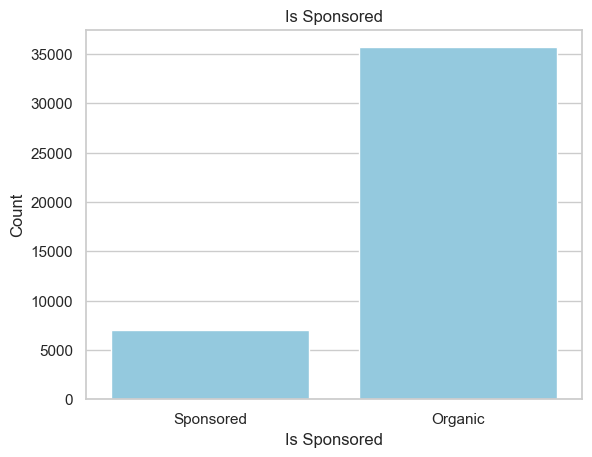

In [39]:
# Count plot for is_sposored
sns.countplot(data=df, x='is_sponsored',color='skyblue')
plt.title('Is Sponsored')
plt.xlabel('Is Sponsored')
plt.ylabel('Count')
plt.show()

---

## Bivariate Analysis – Scatter Plots  

Here we check relationships between two variables:  

- **Rating vs. Number of Reviews** → Shows whether higher ratings are linked to more reviews.  
- **Price Difference vs. Rating** → Checks if products with bigger discounts have higher or lower ratings.  
- **Is Sponsored vs. Discounted Price** → Compares sponsored vs. non-sponsored products with their discounted prices.  

These plots help us explore possible correlations and patterns between variables.  


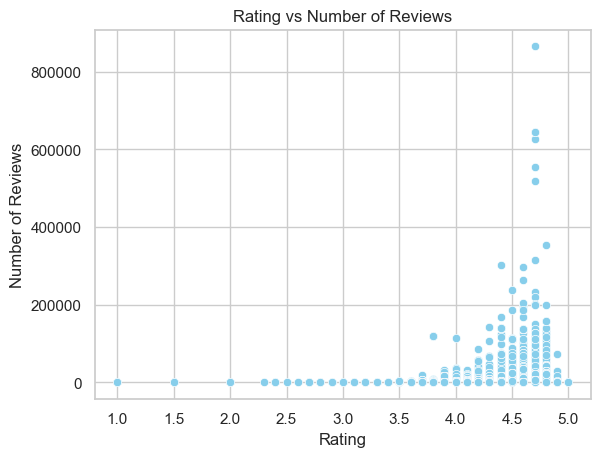

In [40]:
# Bivariate Analysis (Relationships Between Variables)
# Scatter plot between rating and number_of_reviews
sns.scatterplot(data=df, x='rating', y='number_of_reviews',color='skyblue')
plt.title('Rating vs Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

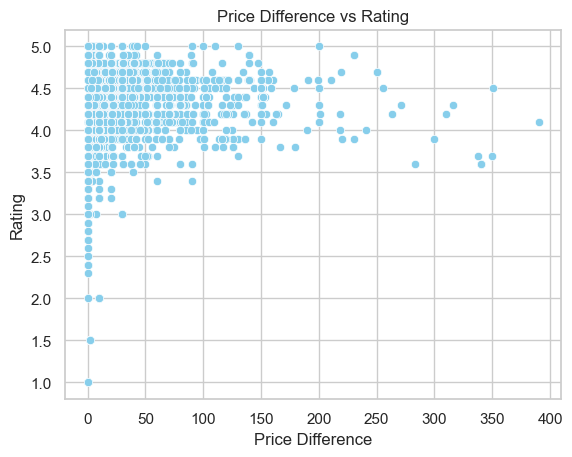

In [41]:
# show if there is a relation between price_difference and rating
sns.scatterplot(data=df, x='price_difference', y='rating',color='skyblue')
plt.title('Price Difference vs Rating')
plt.xlabel('Price Difference')
plt.ylabel('Rating')
plt.show()

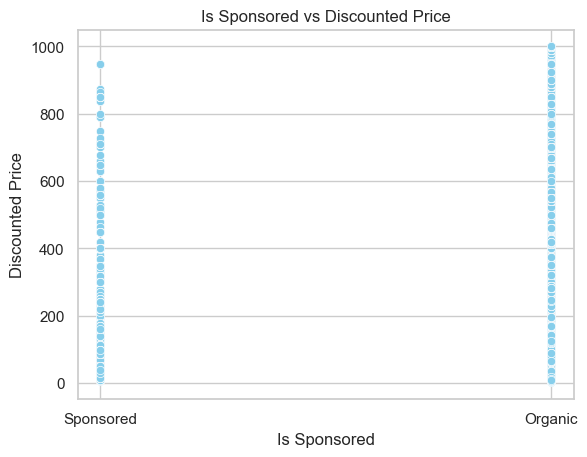

In [42]:
# Show if is_sponsored is related to discounted_price
sns.scatterplot(data=df, x='is_sponsored', y='discounted_price',color='skyblue')
plt.title('Is Sponsored vs Discounted Price')
plt.xlabel('Is Sponsored')
plt.ylabel('Discounted Price')
plt.show()

---

## Advanced Feature Engineering and Analysis  

We add new columns to create more insights:  
- **is_discounted** → whether the product has a discount.  
- **is_high_rating** → whether the product rating is greater than 4.  
- **high_discounted** → marks products with a discount of 20% or more.  
- **price_category** → groups discounted prices into low (≤50), medium (51–100), and high (>100).  

Then we visualize these new features with count plots to see their distribution.  


In [ ]:
# adding some columns to the dataset to make useful insights(advaced analysis)
df['is_discounted'] = df['discount_percentage'] > 0
df['is_high_rating'] = df['rating'] > 4
df['high_discounted'] = (df['discount_percentage']>=20).astype(int)
df['price_category'] = pd.cut(df['discounted_price'], bins=[0, 50, 100, float('inf')], labels=['low', 'medium', 'high'])



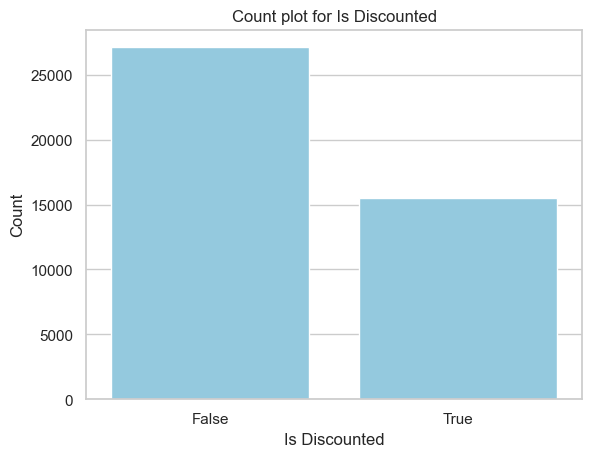

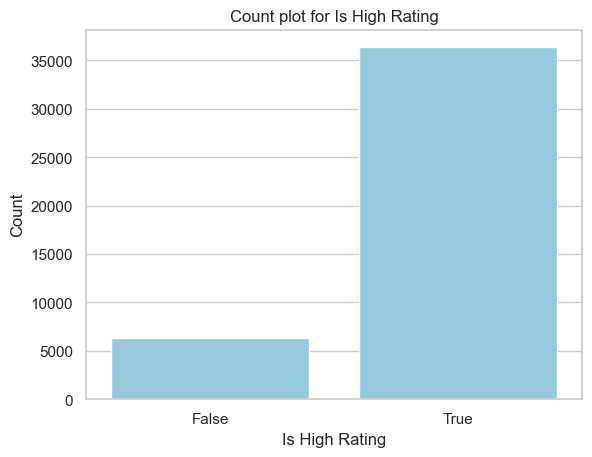

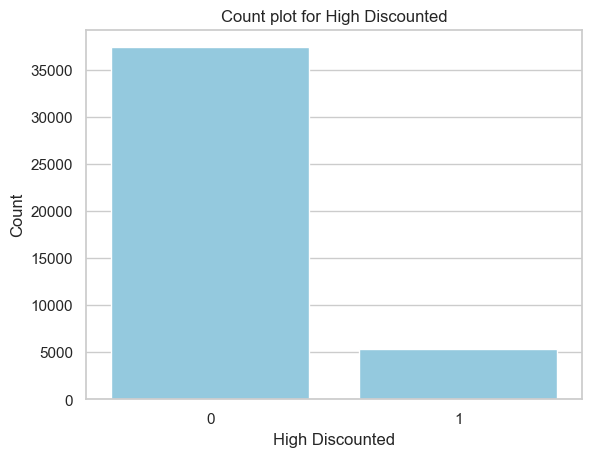

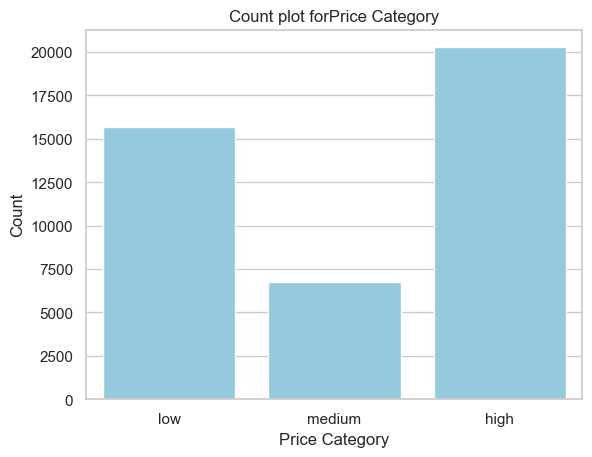

In [44]:
# Making some distributions
# Visualize is_discounted column
sns.countplot(data=df, x='is_discounted',color='skyblue')
plt.title('Count plot for Is Discounted')
plt.xlabel('Is Discounted')
plt.ylabel('Count')
plt.show()
# Visualize is_high_rating column
sns.countplot(data=df, x='is_high_rating',color='skyblue')
plt.title('Count plot for Is High Rating')
plt.xlabel('Is High Rating')
plt.ylabel('Count')
plt.show()
# Visualize high_discounted column
sns.countplot(data=df, x='high_discounted',color='skyblue')
plt.title('Count plot for High Discounted')
plt.xlabel('High Discounted')
plt.ylabel('Count')
plt.show()
# Visualize price_category column
sns.countplot(data=df, x='price_category',color='skyblue')
plt.title('Count plot forPrice Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


---

## Advanced Insights and Relationships  

In this section, we go beyond simple distributions and explore deeper relationships:  

1. **Price Category vs. Sales**  
   - Bar plot showing how different price categories relate to the average number of items bought in the last month.  

2. **Discounts and Demand**  
   - Scatter plot between discount percentage and recent purchases, with colors for different price categories.  

3. **High Discounts vs. Sales**  
   - Bar plot checking if products with ≥20% discount sell more.  

4. **High Ratings vs. Sales**  
   - Bar plot checking if products with ratings >4 sell more recently.  

5. **Category-wise Sales**  
   - Horizontal bar plot showing the average purchases in the last month by product category.  

6. **Price Variation Across Categories**  
   - Bar plot comparing average discounted prices across product categories.  

7. **Correlation Heatmap**  
   - Heatmap showing correlations between numerical variables (e.g., prices, ratings, reviews, discounts).  

These insights help us understand how pricing, discounts, and ratings affect demand and how different product categories behave.  


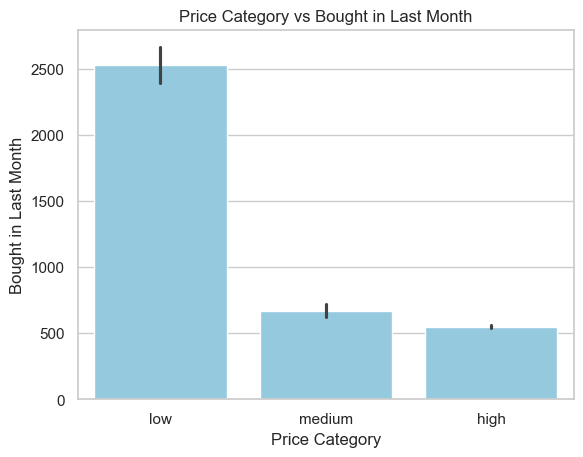

In [ ]:
# Advanced insights
# Bar plot for Price_Category and bought_in_last_month
sns.barplot(data=df, x='price_category', y='bought_in_last_month',color='skyblue')
plt.title('Price Category vs Bought in Last Month')
plt.xlabel('Price Category')
plt.ylabel('Bought in Last Month')
plt.show()


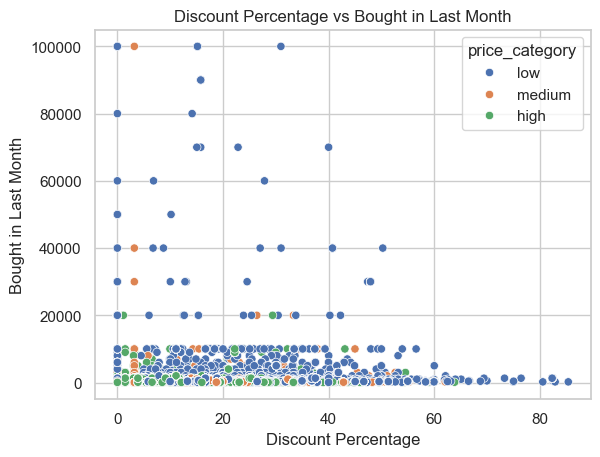

In [47]:
# Discounts and demand
# Scatter plot between discount_percentage and bought_in_last_month
sns.scatterplot(data=df, x='discount_percentage', y='bought_in_last_month',hue='price_category',color='skyblue')
plt.title('Discount Percentage vs Bought in Last Month')
plt.xlabel('Discount Percentage')
plt.ylabel('Bought in Last Month')
plt.show()

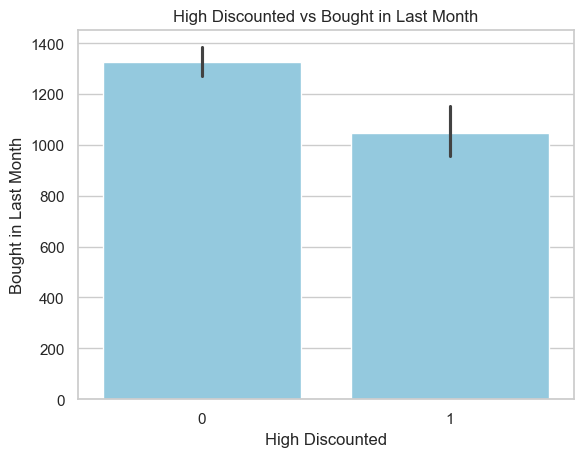

In [48]:
# Are highly discounted products selling more 
sns.barplot(data=df, x='high_discounted', y='bought_in_last_month',color='skyblue',)
plt.title('High Discounted vs Bought in Last Month')
plt.xlabel('High Discounted')
plt.ylabel('Bought in Last Month')
plt.show()

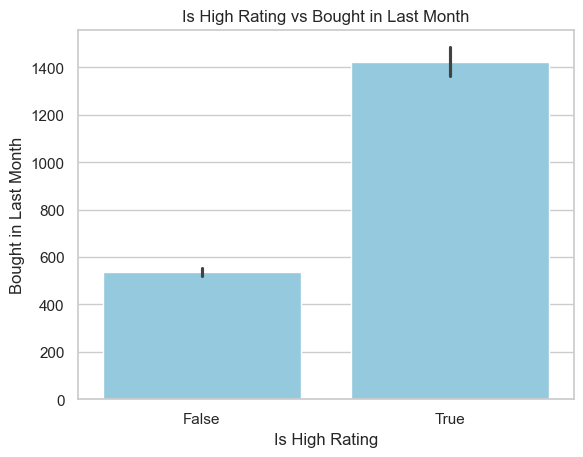

In [49]:
# Do high rated products sell more recently
sns.barplot(data=df, x='is_high_rating', y='bought_in_last_month',color='skyblue')
plt.title('Is High Rating vs Bought in Last Month')
plt.xlabel('Is High Rating')
plt.ylabel('Bought in Last Month')
plt.show()

/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1647/583266125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='product_category', y='bought_in_last_month',palette='viridis',order=df['product_category'].value_counts().index)


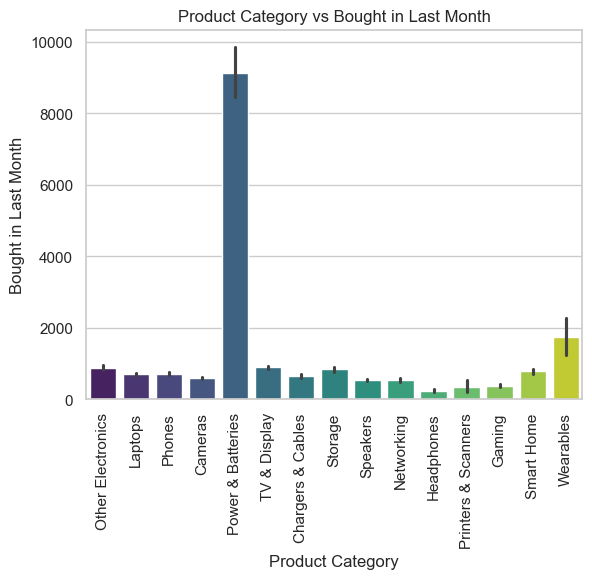

In [ ]:
# Show the highest selling categories in the last month
sns.barplot(data=df, x='product_category', y='bought_in_last_month',palette='viridis',order=df['product_category'].value_counts().index)
plt.title('Product Category vs Bought in Last Month')
plt.xlabel('Product Category')
plt.ylabel('Bought in Last Month')
plt.xticks(rotation=90)
plt.show()




/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_1647/1632073524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='product_category', y='discounted_price',palette='viridis',order=df['product_category'].value_counts().index)


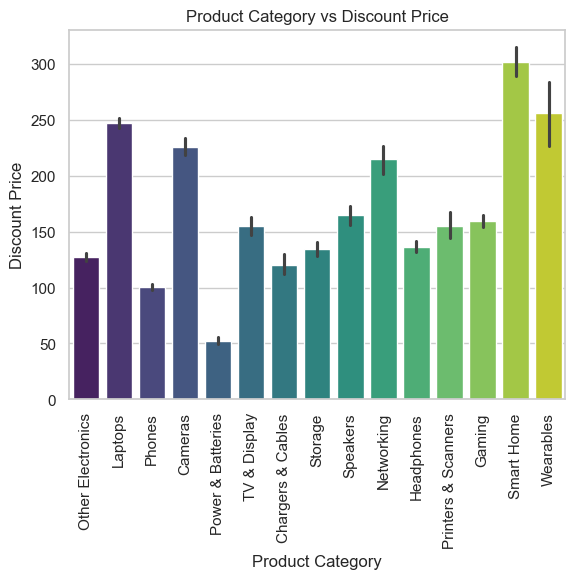

In [53]:
# Price variation across categories.
sns.barplot(data=df, x='product_category', y='discounted_price',palette='viridis',order=df['product_category'].value_counts().index)
plt.title('Product Category vs Discount Price')
plt.xlabel('Product Category')
plt.ylabel('Discount Price')
plt.xticks(rotation=90)
plt.show()

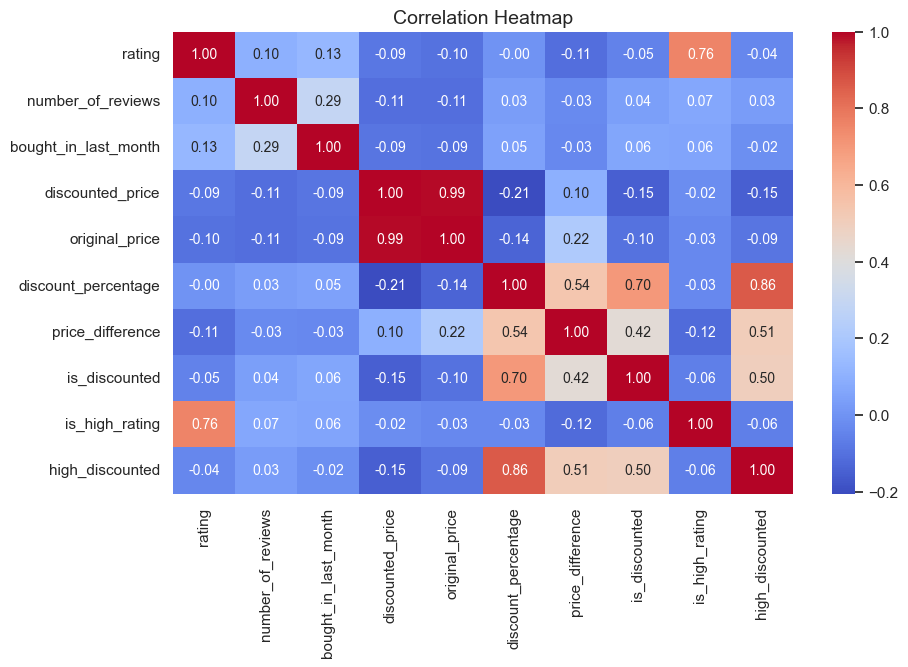

In [52]:
corr = df.corr(numeric_only=True)

# Set figure size (bigger = more readable)
plt.figure(figsize=(10, 6))  

# Draw heatmap
sns.heatmap(
    corr, 
    annot=True,           # show numbers
    fmt=".2f",            # round to 2 decimals
    cmap="coolwarm",      # color scheme
    cbar=True,            # show color bar
    annot_kws={"size":10} # control font size of numbers
)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

---